In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import set_style
set_style("whitegrid")

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import datetime, timedelta

In [2]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SARIMAX

In [3]:
pwd

'/Users/iremaltiner/Desktop/ErdosProject/Bootcamp Project'

In [65]:
train_data = pd.read_csv('/Users/iremaltiner/Desktop/ErdosProject/Bootcamp Project/train-val-test/ordered_train_set.csv',
                        parse_dates=['time','date'])
train_data = train_data.drop(['Unnamed: 0.1','Unnamed: 0.2', 'Unnamed: 0'],axis=1)

In [66]:
train_data.head()

,time,DA_price,actual_load,date,hour,minute,weekday,month,day_of_week,holiday,...,DA_price(t-5D),load(t-5D),RT_price(t-6D),DA_price(t-6D),load(t-6D),RT_price(t-7D),DA_price(t-7D),load(t-7D),nat_gas_spot_price,monthly_avg_NY_natgas_price
0,2020-10-27 01:00:00,17.83,4137.0,2020-10-27,1.0,0.0,1.0,10.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
1,2020-10-27 02:00:00,16.44,3984.0,2020-10-27,2.0,0.0,1.0,10.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
2,2020-10-27 03:00:00,15.45,3895.0,2020-10-27,3.0,0.0,1.0,10.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
3,2020-10-27 04:00:00,16.51,3866.0,2020-10-27,4.0,0.0,1.0,10.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
4,2020-10-27 05:00:00,17.04,3909.0,2020-10-27,5.0,0.0,1.0,10.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22


In [67]:
train_data.tail(25)

,time,DA_price,actual_load,date,hour,minute,weekday,month,day_of_week,holiday,...,DA_price(t-5D),load(t-5D),RT_price(t-6D),DA_price(t-6D),load(t-6D),RT_price(t-7D),DA_price(t-7D),load(t-7D),nat_gas_spot_price,monthly_avg_NY_natgas_price
16093,2022-08-28 23:00:00,94.59,6794.0,2022-08-28,23.0,0.0,0.0,8.0,7.0,0.0,...,94.28,7062.0,114.94,93.88,6941.0,96.96,96.00,6800.0,9.32,11.89
16094,2022-08-29 00:00:00,96.51,6534.0,2022-08-29,0.0,0.0,1.0,8.0,1.0,0.0,...,96.68,6618.0,97.59,93.88,6594.0,80.30,91.50,6524.0,9.24,11.89
16095,2022-08-29 01:00:00,85.91,6351.0,2022-08-29,1.0,0.0,1.0,8.0,1.0,0.0,...,93.18,6266.0,78.08,85.00,6290.0,87.88,84.13,6275.0,9.24,11.89
16096,2022-08-29 02:00:00,82.93,6178.0,2022-08-29,2.0,0.0,1.0,8.0,1.0,0.0,...,86.03,6017.0,88.67,80.46,6051.0,79.81,75.66,6113.0,9.24,11.89
16097,2022-08-29 03:00:00,79.22,6062.0,2022-08-29,3.0,0.0,1.0,8.0,1.0,0.0,...,81.18,5833.0,63.93,75.55,5918.0,75.34,72.87,5996.0,9.24,11.89
16098,2022-08-29 04:00:00,79.63,6070.0,2022-08-29,4.0,0.0,1.0,8.0,1.0,0.0,...,81.93,5725.0,76.94,75.73,5833.0,75.01,75.31,5897.0,9.24,11.89
16099,2022-08-29 05:00:00,83.97,6142.0,2022-08-29,5.0,0.0,1.0,8.0,1.0,0.0,...,86.31,5715.0,75.86,80.80,5897.0,70.75,80.28,5997.0,9.24,11.89
16100,2022-08-29 06:00:00,93.37,6442.0,2022-08-29,6.0,0.0,1.0,8.0,1.0,0.0,...,96.55,5960.0,87.41,89.92,6169.0,79.11,87.96,6309.0,9.24,11.89
16101,2022-08-29 07:00:00,97.09,6898.0,2022-08-29,7.0,0.0,1.0,8.0,1.0,0.0,...,105.25,6418.0,87.28,94.02,6625.0,97.80,96.46,6702.0,9.24,11.89
16102,2022-08-29 08:00:00,112.04,7341.0,2022-08-29,8.0,0.0,1.0,8.0,1.0,0.0,...,111.81,6917.0,95.92,99.50,7106.0,114.91,104.54,7110.0,9.24,11.89


In [68]:
train_data = train_data.set_index('time')
train_data.head()

,DA_price,actual_load,date,hour,minute,weekday,month,day_of_week,holiday,business_hour,...,DA_price(t-5D),load(t-5D),RT_price(t-6D),DA_price(t-6D),load(t-6D),RT_price(t-7D),DA_price(t-7D),load(t-7D),nat_gas_spot_price,monthly_avg_NY_natgas_price
time,,,,,,,,,,,,,,,,,,,,,
2020-10-27 01:00:00,17.83,4137.0,2020-10-27,1.0,0.0,1.0,10.0,2.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
2020-10-27 02:00:00,16.44,3984.0,2020-10-27,2.0,0.0,1.0,10.0,2.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
2020-10-27 03:00:00,15.45,3895.0,2020-10-27,3.0,0.0,1.0,10.0,2.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
2020-10-27 04:00:00,16.51,3866.0,2020-10-27,4.0,0.0,1.0,10.0,2.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22
2020-10-27 05:00:00,17.04,3909.0,2020-10-27,5.0,0.0,1.0,10.0,2.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.07,6.22


In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16118 entries, 2020-10-27 01:00:00 to 2022-08-29 23:00:00
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DA_price                     16118 non-null  float64       
 1   actual_load                  16118 non-null  float64       
 2   date                         16118 non-null  datetime64[ns]
 3   hour                         16118 non-null  float64       
 4   minute                       16118 non-null  float64       
 5   weekday                      16118 non-null  float64       
 6   month                        16118 non-null  float64       
 7   day_of_week                  16118 non-null  float64       
 8   holiday                      16118 non-null  float64       
 9   business_hour                16118 non-null  float64       
 10  season                       16118 non-null  float64       
 11  temp  

In [70]:
test_data = pd.read_csv('/Users/iremaltiner/Desktop/ErdosProject/Bootcamp Project/train-val-test/ordered_test_set.csv',
                        parse_dates=['time','date'])
test_data = test_data.drop(['Unnamed: 0.1','Unnamed: 0.2', 'Unnamed: 0'],axis=1)

In [71]:
test_data.head()

,time,DA_price,actual_load,date,hour,minute,weekday,month,day_of_week,holiday,...,DA_price(t-5D),load(t-5D),RT_price(t-6D),DA_price(t-6D),load(t-6D),RT_price(t-7D),DA_price(t-7D),load(t-7D),nat_gas_spot_price,monthly_avg_NY_natgas_price
0,2022-08-30 00:00:00,107.90,7045.0,2022-08-30,0.0,0.0,1.0,8.0,2.0,0.0,...,103.87,6798.0,108.53,96.68,6618.0,97.59,93.88,6594.0,9.1,11.89
1,2022-08-30 01:00:00,90.86,6683.0,2022-08-30,1.0,0.0,1.0,8.0,2.0,0.0,...,91.31,6461.0,106.69,93.18,6266.0,78.08,85.00,6290.0,9.1,11.89
2,2022-08-30 02:00:00,84.54,6417.0,2022-08-30,2.0,0.0,1.0,8.0,2.0,0.0,...,88.50,6164.0,87.34,86.03,6017.0,88.67,80.46,6051.0,9.1,11.89
3,2022-08-30 03:00:00,84.80,6249.0,2022-08-30,3.0,0.0,1.0,8.0,2.0,0.0,...,78.73,5990.0,79.80,81.18,5833.0,63.93,75.55,5918.0,9.1,11.89
4,2022-08-30 04:00:00,88.75,6176.0,2022-08-30,4.0,0.0,1.0,8.0,2.0,0.0,...,81.30,5871.0,78.53,81.93,5725.0,76.94,75.73,5833.0,9.1,11.89


In [72]:
test_data = test_data.set_index('time')
test_data.head()

,DA_price,actual_load,date,hour,minute,weekday,month,day_of_week,holiday,business_hour,...,DA_price(t-5D),load(t-5D),RT_price(t-6D),DA_price(t-6D),load(t-6D),RT_price(t-7D),DA_price(t-7D),load(t-7D),nat_gas_spot_price,monthly_avg_NY_natgas_price
time,,,,,,,,,,,,,,,,,,,,,
2022-08-30 00:00:00,107.90,7045.0,2022-08-30,0.0,0.0,1.0,8.0,2.0,0.0,0.0,...,103.87,6798.0,108.53,96.68,6618.0,97.59,93.88,6594.0,9.1,11.89
2022-08-30 01:00:00,90.86,6683.0,2022-08-30,1.0,0.0,1.0,8.0,2.0,0.0,0.0,...,91.31,6461.0,106.69,93.18,6266.0,78.08,85.00,6290.0,9.1,11.89
2022-08-30 02:00:00,84.54,6417.0,2022-08-30,2.0,0.0,1.0,8.0,2.0,0.0,0.0,...,88.50,6164.0,87.34,86.03,6017.0,88.67,80.46,6051.0,9.1,11.89
2022-08-30 03:00:00,84.80,6249.0,2022-08-30,3.0,0.0,1.0,8.0,2.0,0.0,0.0,...,78.73,5990.0,79.80,81.18,5833.0,63.93,75.55,5918.0,9.1,11.89
2022-08-30 04:00:00,88.75,6176.0,2022-08-30,4.0,0.0,1.0,8.0,2.0,0.0,0.0,...,81.30,5871.0,78.53,81.93,5725.0,76.94,75.73,5833.0,9.1,11.89


In [89]:
test_data.index = pd.DatetimeIndex(test_data.index).to_period('H') 

In [73]:
val_data = pd.read_csv('/Users/iremaltiner/Desktop/ErdosProject/Bootcamp Project/train-val-test/ordered_seasonal_validation_set.csv',
                        parse_dates=['time','date'])
val_data = val_data.drop(['Unnamed: 0.1','Unnamed: 0.2', 'Unnamed: 0'],axis=1)

In [17]:
val_data

,time,DA_price,actual_load,date,hour,minute,weekday,month,day_of_week,holiday,...,DA_price(t-5D),load(t-5D),RT_price(t-6D),DA_price(t-6D),load(t-6D),RT_price(t-7D),DA_price(t-7D),load(t-7D),nat_gas_spot_price,monthly_avg_NY_natgas_price
0,2022-09-01 00:00:00,69.16,6247.0,2022-09-01,0.0,0.0,1.0,9.0,4.0,0.0,...,96.80,7016.0,94.93,104.96,6855.0,87.30,103.87,6798.0,9.380000,12.20
1,2022-09-01 01:00:00,64.95,5904.0,2022-09-01,1.0,0.0,1.0,9.0,4.0,0.0,...,89.01,6703.0,95.76,91.14,6564.0,99.40,91.31,6461.0,9.380000,12.20
2,2022-09-01 02:00:00,64.25,5662.0,2022-09-01,2.0,0.0,1.0,9.0,4.0,0.0,...,83.68,6439.0,89.80,87.21,6339.0,91.02,88.50,6164.0,9.380000,12.20
3,2022-09-01 03:00:00,63.12,5481.0,2022-09-01,3.0,0.0,1.0,9.0,4.0,0.0,...,81.14,6197.0,83.93,82.45,6147.0,82.91,78.73,5990.0,9.380000,12.20
4,2022-09-01 04:00:00,63.82,5375.0,2022-09-01,4.0,0.0,1.0,9.0,4.0,0.0,...,77.43,6059.0,85.00,81.47,6045.0,75.84,81.30,5871.0,9.380000,12.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,2023-08-26 19:00:00,26.02,7017.0,2023-08-26,19.0,0.0,0.0,8.0,6.0,0.0,...,42.77,8327.0,42.02,29.70,6767.0,19.58,25.22,6062.0,2.506667,7.05
3135,2023-08-26 20:00:00,26.18,6844.0,2023-08-26,20.0,0.0,0.0,8.0,6.0,0.0,...,37.64,8171.0,36.94,30.69,6735.0,14.11,25.26,5958.0,2.506667,7.05
3136,2023-08-26 21:00:00,25.98,6752.0,2023-08-26,21.0,0.0,0.0,8.0,6.0,0.0,...,31.49,8037.0,41.53,27.90,6736.0,-0.15,24.71,5930.0,2.506667,7.05
3137,2023-08-26 22:00:00,25.87,6572.0,2023-08-26,22.0,0.0,0.0,8.0,6.0,0.0,...,28.05,7728.0,39.07,25.71,6652.0,-1.27,23.48,5842.0,2.506667,7.05


In [74]:
val_data = val_data.set_index('time')
val_data.head()

,DA_price,actual_load,date,hour,minute,weekday,month,day_of_week,holiday,business_hour,...,DA_price(t-5D),load(t-5D),RT_price(t-6D),DA_price(t-6D),load(t-6D),RT_price(t-7D),DA_price(t-7D),load(t-7D),nat_gas_spot_price,monthly_avg_NY_natgas_price
time,,,,,,,,,,,,,,,,,,,,,
2022-09-01 00:00:00,69.16,6247.0,2022-09-01,0.0,0.0,1.0,9.0,4.0,0.0,0.0,...,96.80,7016.0,94.93,104.96,6855.0,87.30,103.87,6798.0,9.38,12.2
2022-09-01 01:00:00,64.95,5904.0,2022-09-01,1.0,0.0,1.0,9.0,4.0,0.0,0.0,...,89.01,6703.0,95.76,91.14,6564.0,99.40,91.31,6461.0,9.38,12.2
2022-09-01 02:00:00,64.25,5662.0,2022-09-01,2.0,0.0,1.0,9.0,4.0,0.0,0.0,...,83.68,6439.0,89.80,87.21,6339.0,91.02,88.50,6164.0,9.38,12.2
2022-09-01 03:00:00,63.12,5481.0,2022-09-01,3.0,0.0,1.0,9.0,4.0,0.0,0.0,...,81.14,6197.0,83.93,82.45,6147.0,82.91,78.73,5990.0,9.38,12.2
2022-09-01 04:00:00,63.82,5375.0,2022-09-01,4.0,0.0,1.0,9.0,4.0,0.0,0.0,...,77.43,6059.0,85.00,81.47,6045.0,75.84,81.30,5871.0,9.38,12.2


In [90]:
val_data.index = pd.DatetimeIndex(val_data.index).to_period('H')

# Baseline Model

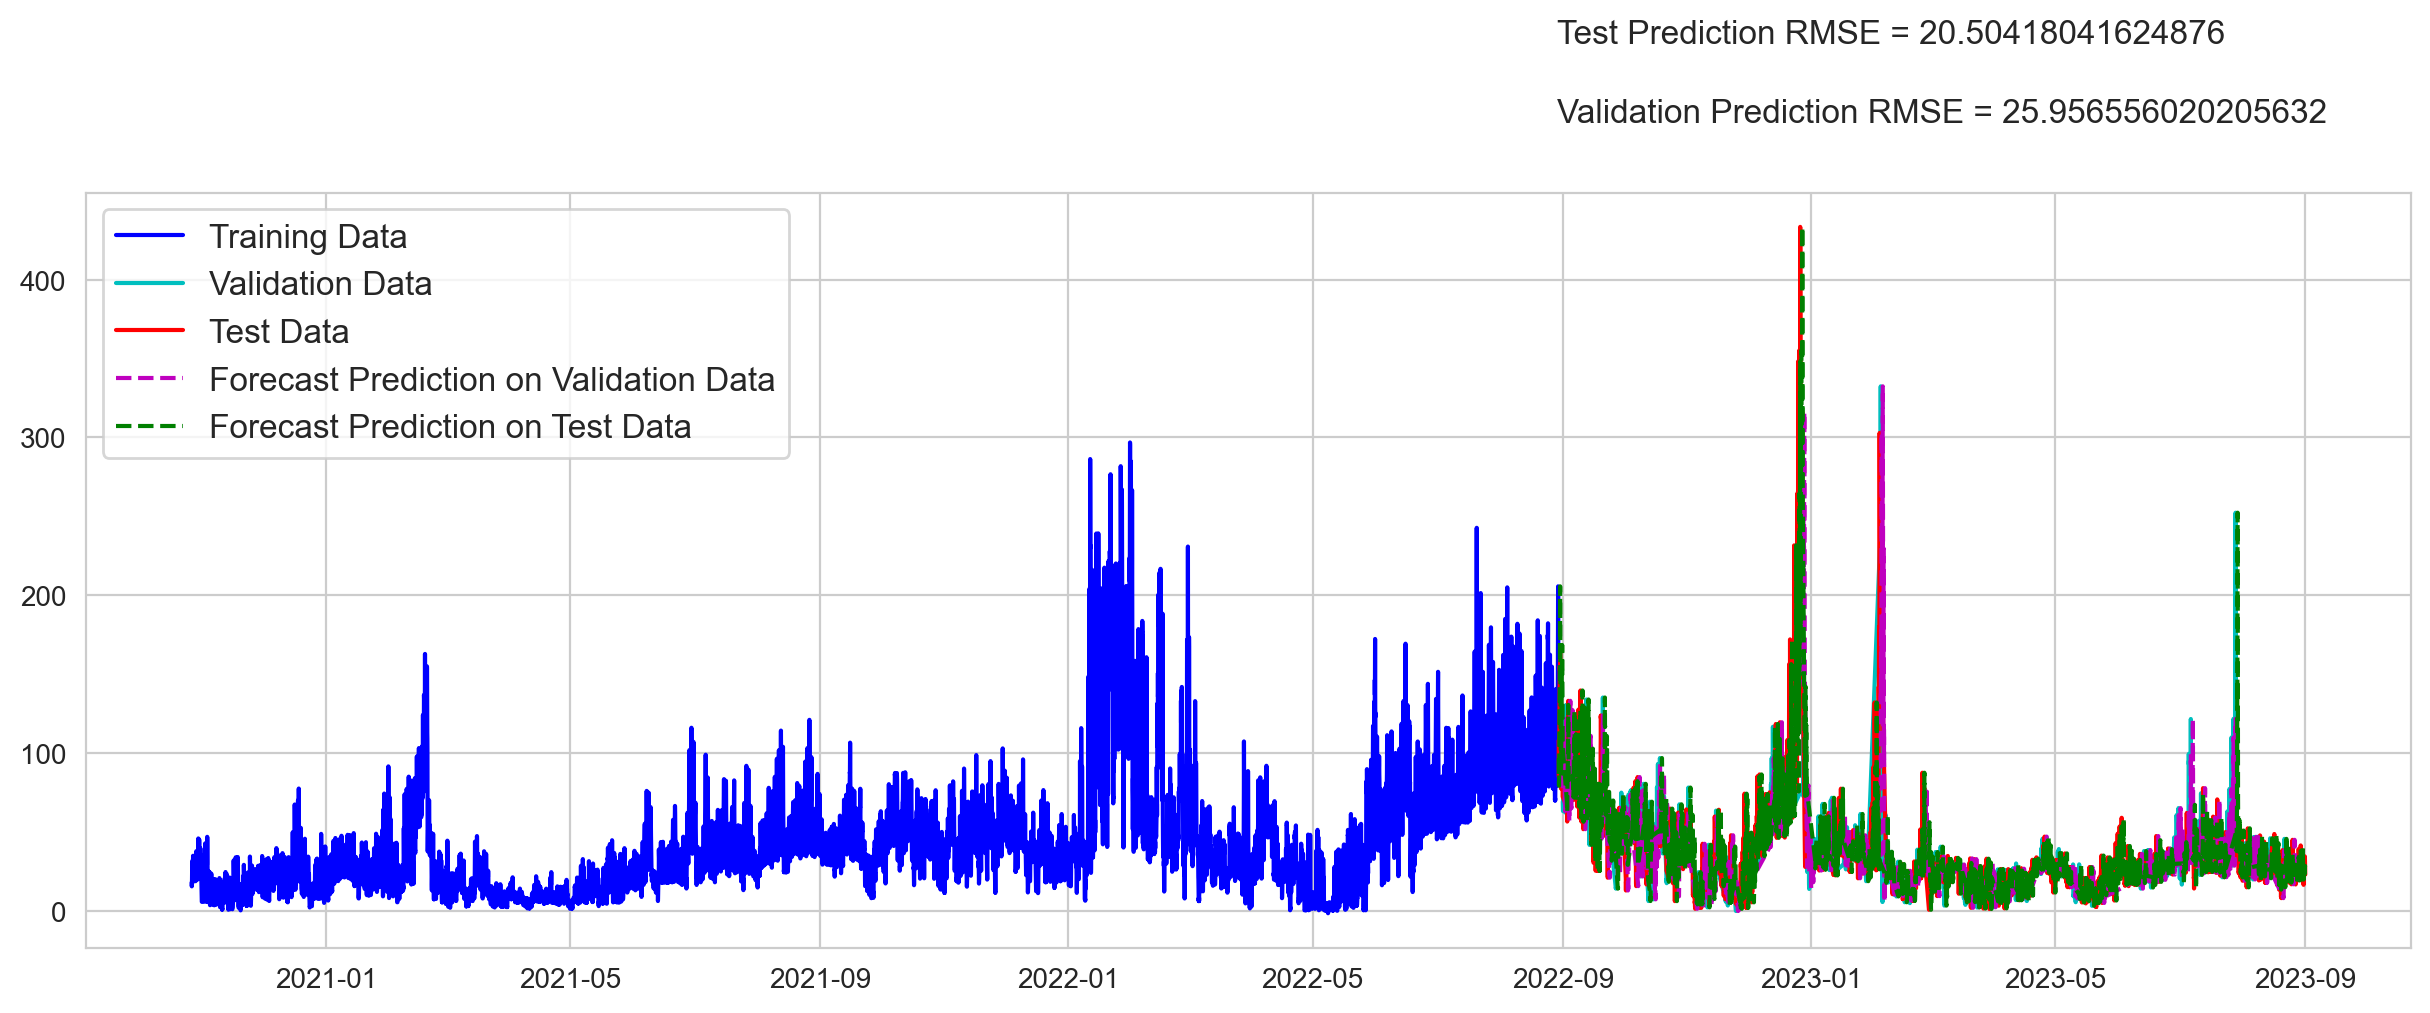

In [75]:
plt.figure(figsize=(15,5), dpi=200)

plt.plot(train_data['DA_price'],
            'b-',
            label="Training Data")

plt.plot(val_data['DA_price'],
            'c-',
            label="Validation Data")

plt.plot(test_data['DA_price'],
            'r-',
            label="Test Data")

plt.plot(val_data['DA_price(t-1D)'],
            'm--',
            label="Forecast Prediction on Validation Data")

plt.plot(test_data['DA_price(t-1D)'],
            'g--',
            label="Forecast Prediction on Test Data")

plt.text(train_data['date'].values[-10], 500,
         "Validation Prediction RMSE = " + str(np.sqrt(mean_squared_error(val_data['DA_price'],
                                                                  val_data['DA_price(t-1D)']))),
         fontsize=12)
plt.text(train_data['date'].values[-10], 550,
         "Test Prediction RMSE = " + str(np.sqrt(mean_squared_error(test_data['DA_price'],
                                                                  test_data['DA_price(t-1D)']))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

In [76]:
a = (mean_squared_error(val_data['DA_price'], val_data['DA_price(t-1D)'])*len(val_data) + 
 mean_squared_error(test_data['DA_price'], test_data['DA_price(t-1D)'])*len(test_data))/(len(val_data)+len(test_data))
np.sqrt(a)

22.601629918031954

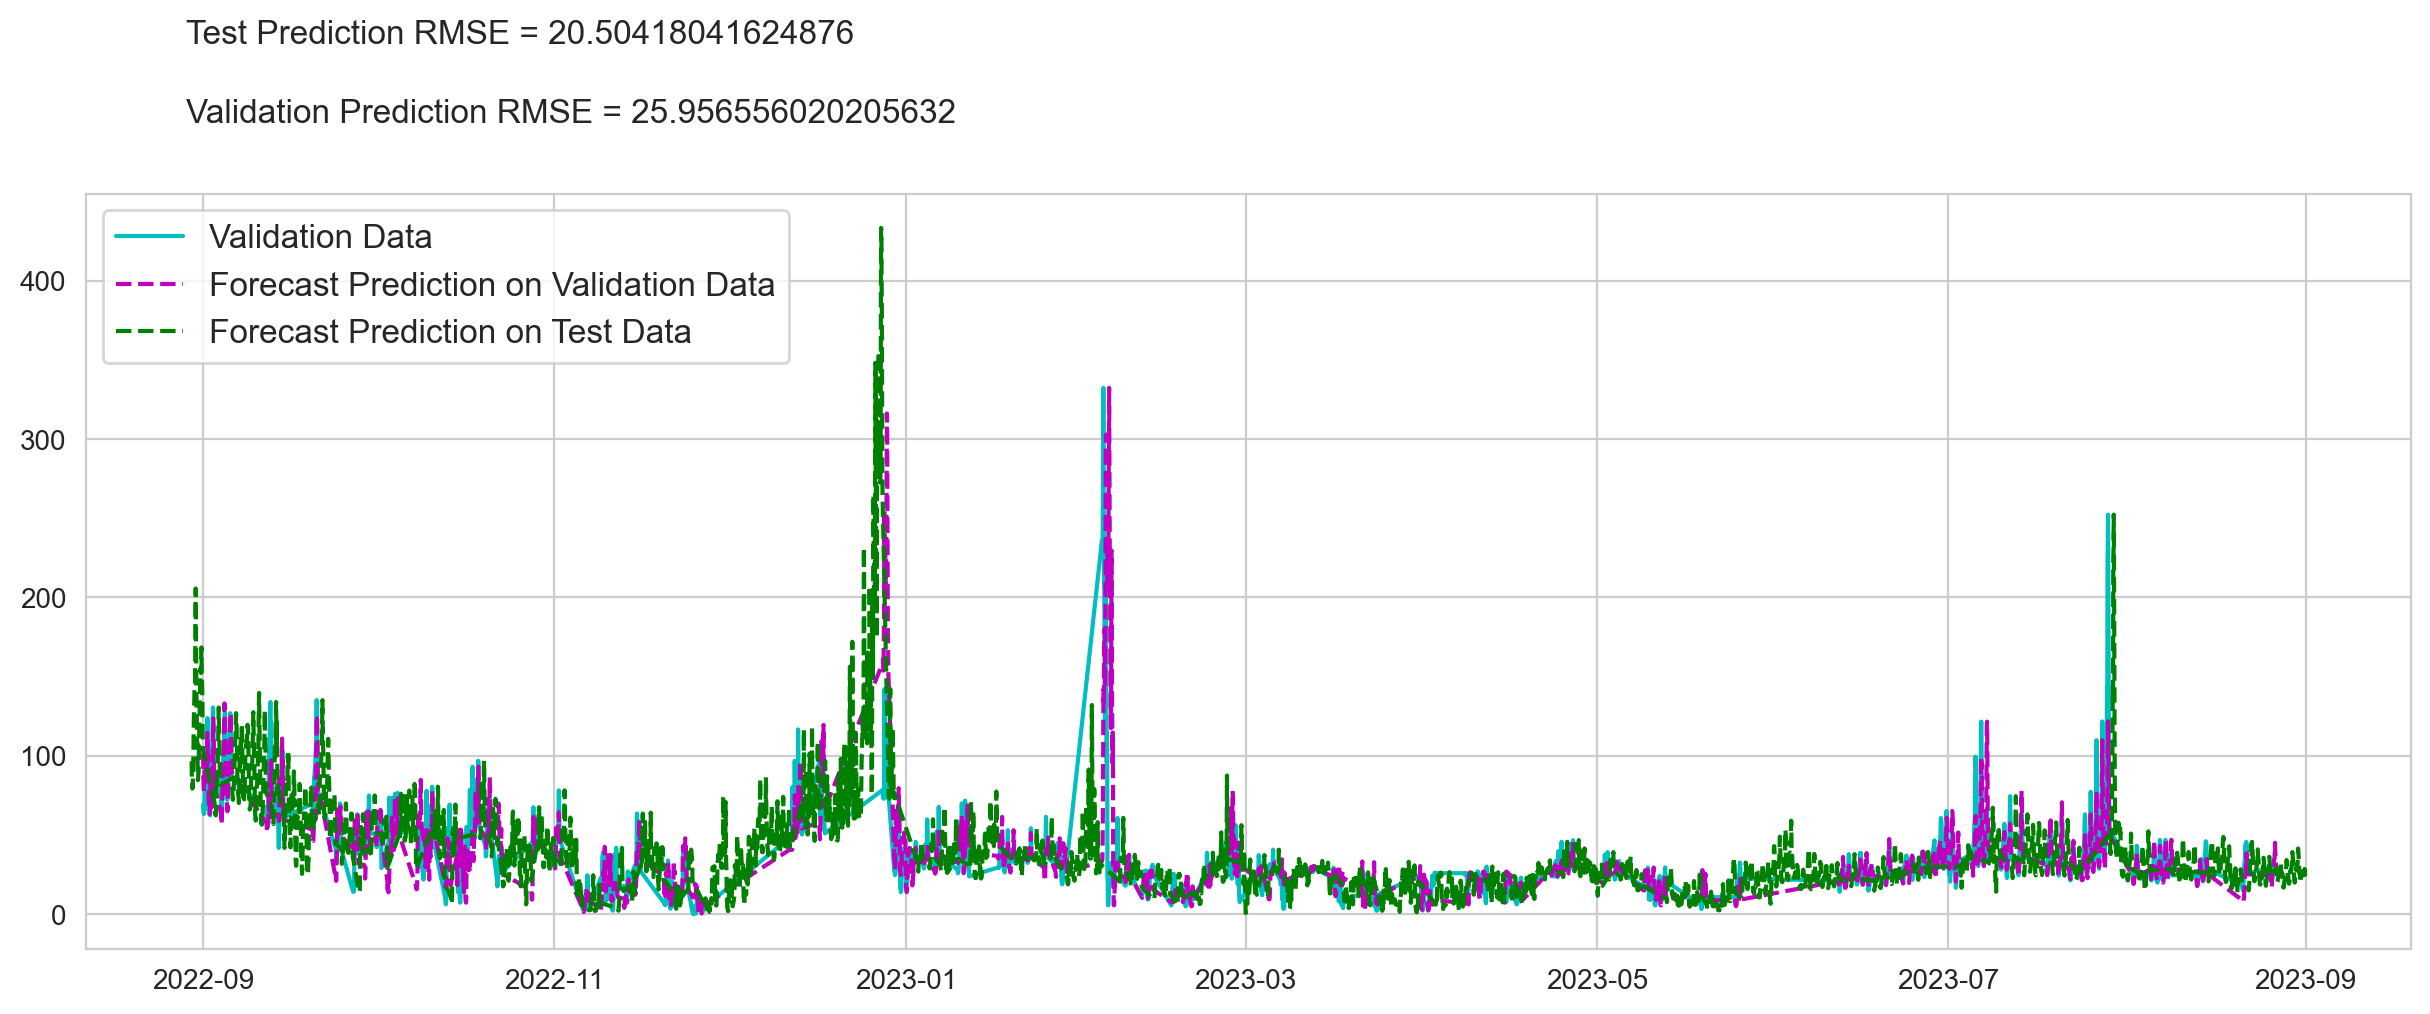

In [77]:
plt.figure(figsize=(15,5), dpi=200)

plt.plot(val_data['DA_price'],
            'c-',
            label="Validation Data")

plt.plot(val_data['DA_price(t-1D)'],
            'm--',
            label="Forecast Prediction on Validation Data")

plt.plot(test_data['DA_price(t-1D)'],
            'g--',
            label="Forecast Prediction on Test Data")

plt.text(train_data['date'].values[-10], 500,
         "Validation Prediction RMSE = " + str(np.sqrt(mean_squared_error(val_data['DA_price'],
                                                                  val_data['DA_price(t-1D)']))),
         fontsize=12)
plt.text(train_data['date'].values[-10], 550,
         "Test Prediction RMSE = " + str(np.sqrt(mean_squared_error(test_data['DA_price'],
                                                                  test_data['DA_price(t-1D)']))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

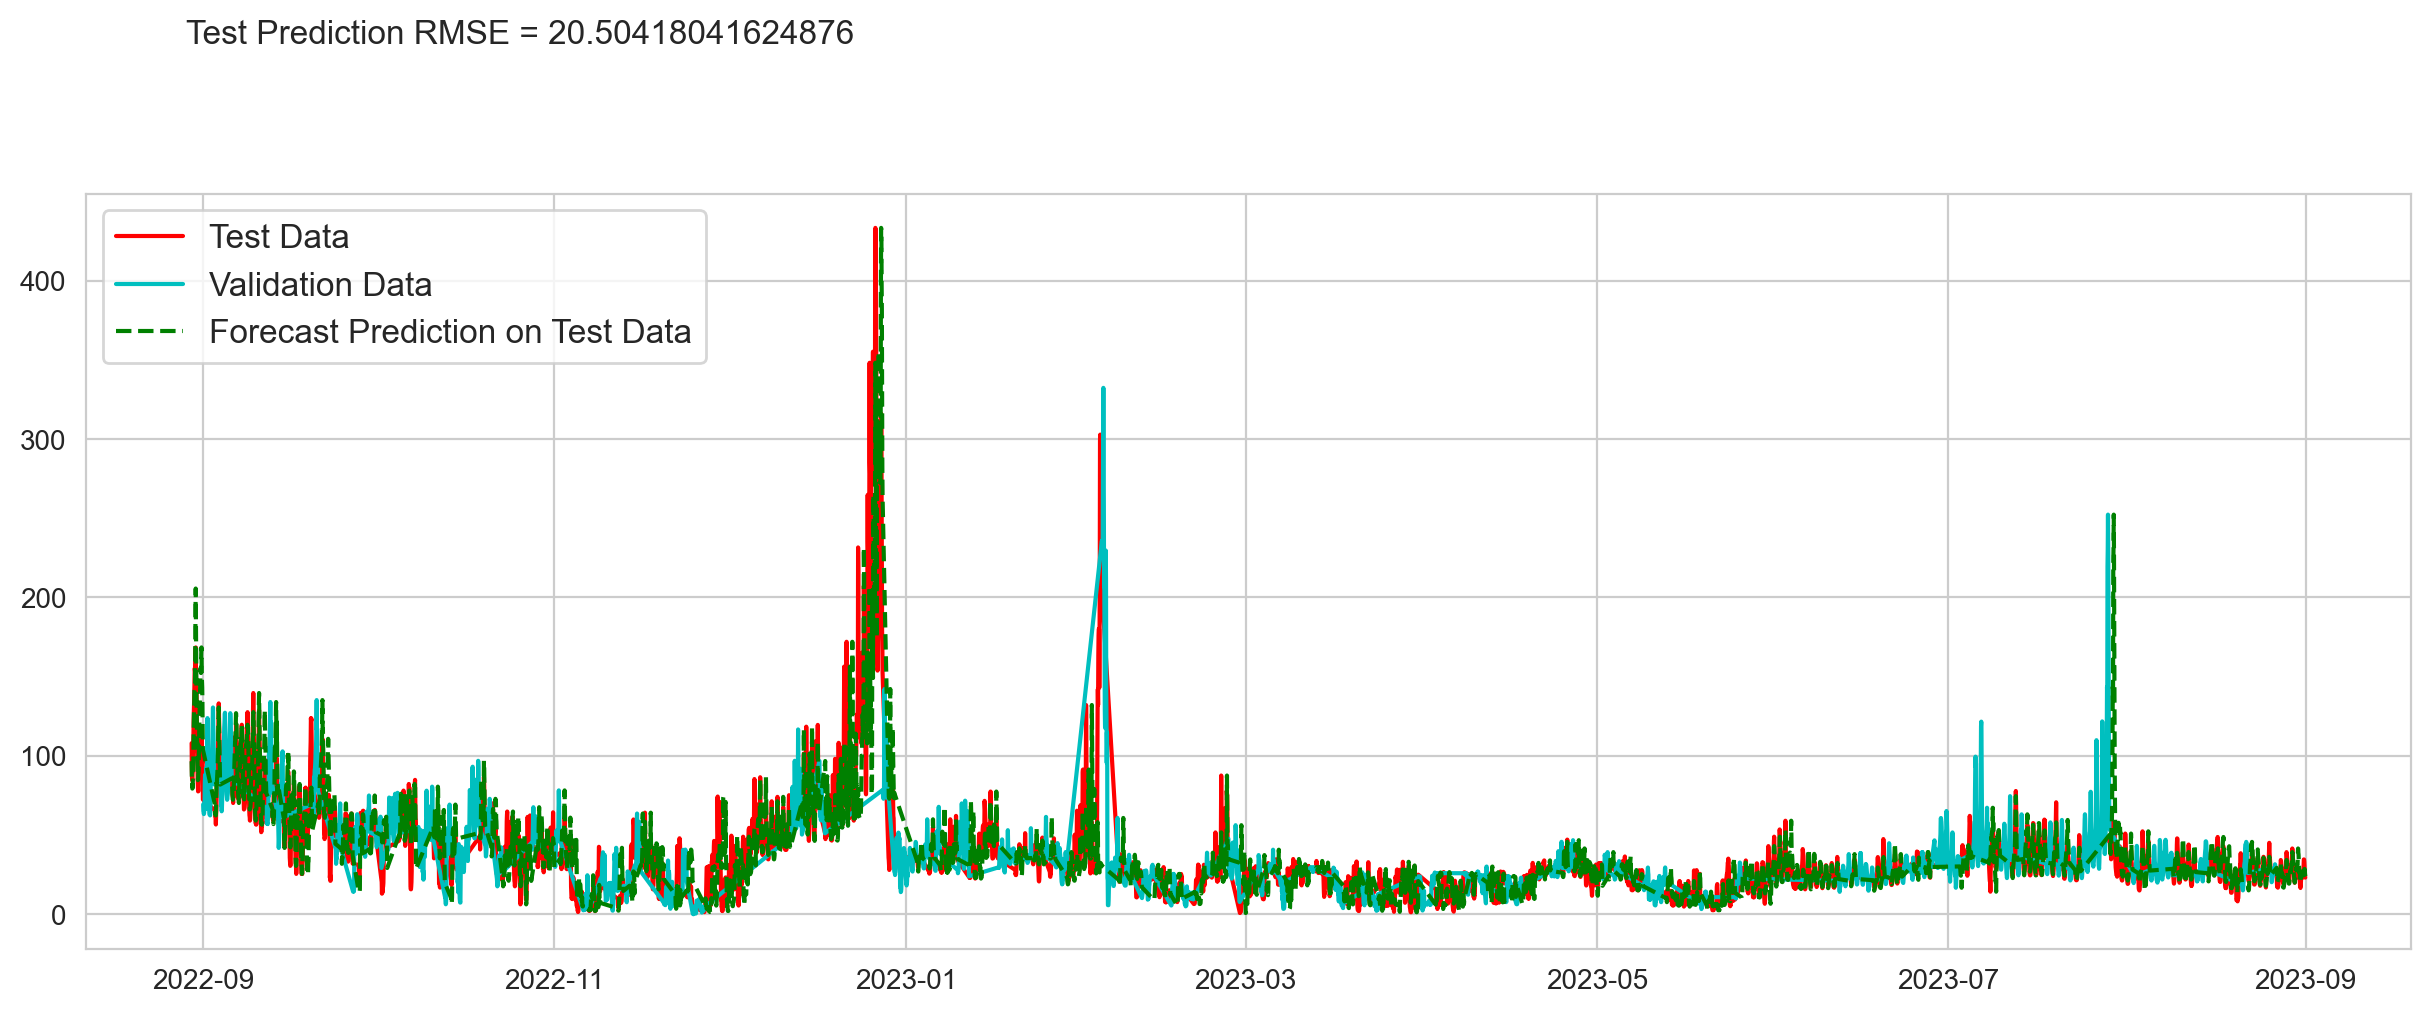

In [78]:
plt.figure(figsize=(15,5), dpi=200)

plt.plot(test_data['DA_price'],
            'r-',
            label="Test Data")

plt.plot(val_data['DA_price'],
            'c-',
          label="Validation Data")

plt.plot(test_data['DA_price(t-1D)'],
            'g--',
            label="Forecast Prediction on Test Data")

plt.text(train_data['date'].values[-10], 550,
         "Test Prediction RMSE = " + str(np.sqrt(mean_squared_error(test_data['DA_price'],
                                                                  test_data['DA_price(t-1D)']))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

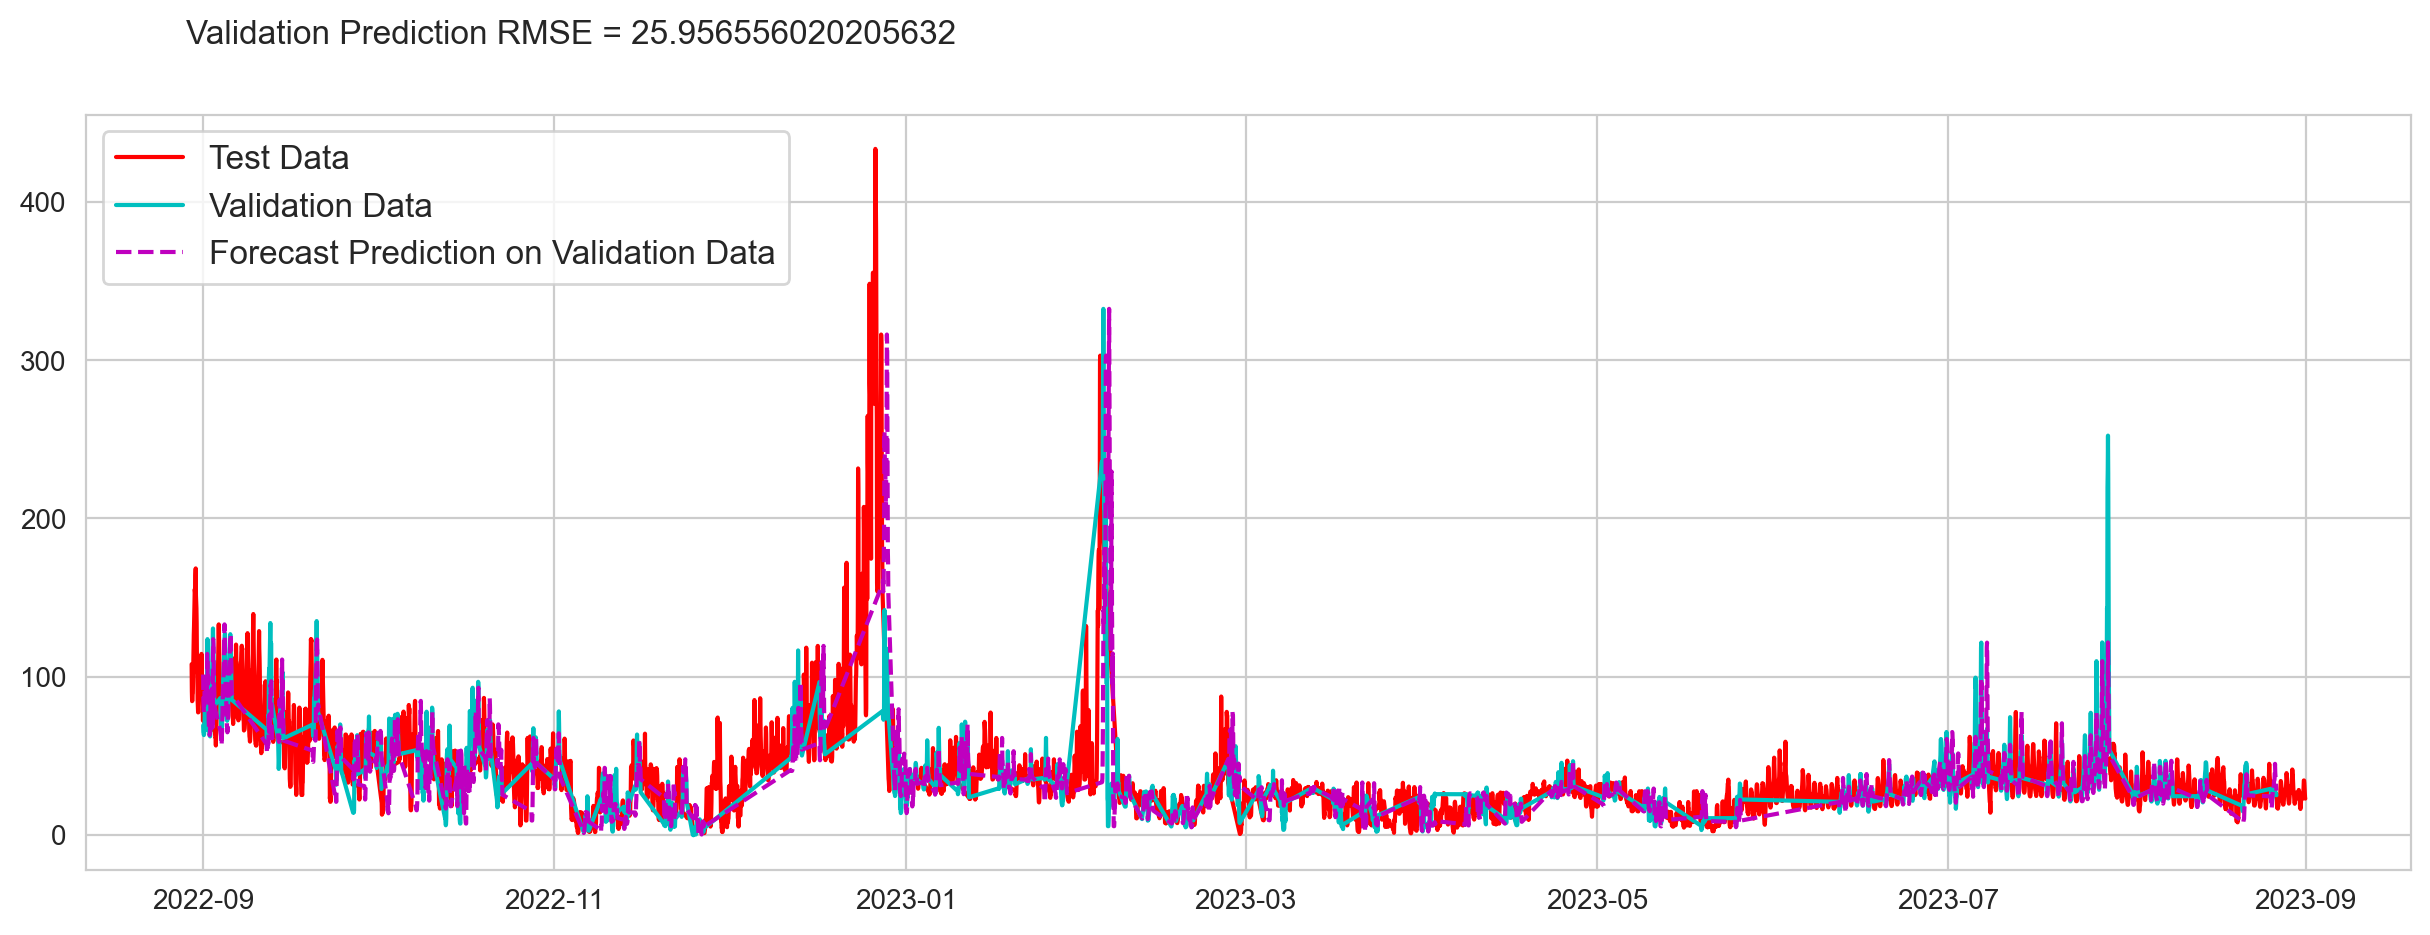

In [79]:
plt.figure(figsize=(15,5), dpi=200)

plt.plot(test_data['DA_price'],
            'r-',
            label="Test Data")

plt.plot(val_data['DA_price'],
            'c-',
          label="Validation Data")

plt.plot(val_data['DA_price(t-1D)'],
            'm--',
            label="Forecast Prediction on Validation Data")


plt.text(train_data['date'].values[-10], 500,
         "Validation Prediction RMSE = " + str(np.sqrt(mean_squared_error(val_data['DA_price'],
                                                                  val_data['DA_price(t-1D)']))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

# ARIMA

In [80]:
train_data.columns

Index(['DA_price', 'actual_load', 'date', 'hour', 'minute', 'weekday', 'month',
       'day_of_week', 'holiday', 'business_hour', 'season', 'temp', 'dwpt',
       'RT_price', 'avg_DA_price(h-24)', 'avg_load(h-24)', 'RT_price(t-1D)',
       'DA_price(t-1D)', 'load(t-1D)', 'RT_price(t-2D)', 'DA_price(t-2D)',
       'load(t-2D)', 'RT_price(t-3D)', 'DA_price(t-3D)', 'load(t-3D)',
       'RT_price(t-4D)', 'DA_price(t-4D)', 'load(t-4D)', 'RT_price(t-5D)',
       'DA_price(t-5D)', 'load(t-5D)', 'RT_price(t-6D)', 'DA_price(t-6D)',
       'load(t-6D)', 'RT_price(t-7D)', 'DA_price(t-7D)', 'load(t-7D)',
       'nat_gas_spot_price', 'monthly_avg_NY_natgas_price'],
      dtype='object')

In [81]:
correlations_pearson_no_realtime = train_data.corrwith(train_data['DA_price'], method='pearson', 
                                                  numeric_only=True, axis=0)
correlations_pearson_no_realtime.sort_values(ascending=False)

DA_price                       1.000000
DA_price(t-1D)                 0.846148
avg_DA_price(h-24)             0.809457
DA_price(t-2D)                 0.777192
DA_price(t-3D)                 0.747179
DA_price(t-5D)                 0.737019
DA_price(t-4D)                 0.732437
DA_price(t-6D)                 0.707098
DA_price(t-7D)                 0.697319
actual_load                    0.573767
RT_price                       0.520016
monthly_avg_NY_natgas_price    0.519557
load(t-1D)                     0.513423
load(t-7D)                     0.467164
load(t-2D)                     0.465210
avg_load(h-24)                 0.462321
load(t-6D)                     0.457550
RT_price(t-1D)                 0.454517
nat_gas_spot_price             0.453589
load(t-3D)                     0.447425
load(t-5D)                     0.443562
load(t-4D)                     0.442642
RT_price(t-2D)                 0.425047
RT_price(t-3D)                 0.403998
RT_price(t-5D)                 0.390542


In [86]:
train_data.index = pd.DatetimeIndex(train_data.index).to_period('H')

In [87]:
train_data.index

PeriodIndex(['2020-10-27 01:00', '2020-10-27 02:00', '2020-10-27 03:00',
             '2020-10-27 04:00', '2020-10-27 05:00', '2020-10-27 06:00',
             '2020-10-27 07:00', '2020-10-27 08:00', '2020-10-27 09:00',
             '2020-10-27 10:00',
             ...
             '2022-08-29 14:00', '2022-08-29 15:00', '2022-08-29 16:00',
             '2022-08-29 17:00', '2022-08-29 18:00', '2022-08-29 19:00',
             '2022-08-29 20:00', '2022-08-29 21:00', '2022-08-29 22:00',
             '2022-08-29 23:00'],
            dtype='period[H]', name='time', length=16118)

In [104]:
f1 = ['DA_price(t-1D)', 'DA_price(t-2D)',
       'DA_price(t-3D)', 'DA_price(t-4D)', 'DA_price(t-5D)', 'avg_DA_price(h-24)']
f2 = ['DA_price(t-1D)', 'DA_price(t-2D)','avg_DA_price(h-24)']
f3 = ['DA_price(t-1D)', 'DA_price(t-2D)',
       'DA_price(t-3D)', 'DA_price(t-4D)', 'DA_price(t-5D)', 'avg_DA_price(h-24)', 'DA_price(t-6D)',
     'DA_price(t-7D)', 'actual_load']

In [203]:
rmse = dict()
mylist = [f1, f2, f3, 0]
for item in mylist:
    if item == 0:
        arima = SARIMAX(endog=train_data['DA_price'],
                   order=(24, 1, 7))
        fitted_arima = arima.fit(maxiter=200)
        val_obs = fitted_arima.apply(endog = val_data['DA_price'], refit=False)
        preds = val_obs.predict(0,len(val_data)-1,dynamic=False)
        rmse[f'{item} rmse'] = np.sqrt(mean_squared_error(val_data['DA_price'],preds))
    else:
        arima = SARIMAX(endog=train_data['DA_price'], exog=train_data[item],
                       order=(24, 1, 7))
        fitted_arima = arima.fit(maxiter=200)
        val_obs = fitted_arima.apply(endog = val_data['DA_price'], exog=val_data[item], refit=False)
        preds = val_obs.predict(0,len(val_data)-1, dynamic=False)
        rmse[f'{item} rmse'] = np.sqrt(mean_squared_error(val_data['DA_price'],preds))

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35749D+00    |proj g|=  8.46894D-02

At iterate    5    f=  3.33478D+00    |proj g|=  2.64852D-03

At iterate   10    f=  3.33375D+00    |proj g|=  6.75422D-03

At iterate   15    f=  3.33338D+00    |proj g|=  4.04958D-03

At iterate   20    f=  3.33298D+00    |proj g|=  4.66998D-03

At iterate   25    f=  3.33288D+00    |proj g|=  1.16106D-03

At iterate   30    f=  3.33262D+00    |proj g|=  5.64915D-03

At iterate   35    f=  3.33067D+00    |proj g|=  1.26478D-02

At iterate   40    f=  3.32825D+00    |proj g|=  6.75428D-03

At iterate   45    f=  3.32658D+00    |proj g|=  2.01712D-02

At iterate   50    f=  3.32585D+00    |proj g|=  3.48248D-03

At iterate   55    f=  3.32577D+00    |proj g|=  1.43104D-03

At iterate   60    f=  3.32570D+00    |proj g|=  2.64657D-03

At iterate   65    f=  3.3

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  200    f=  3.32499D+00    |proj g|=  1.30054D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   38    200    219      1     0     0   1.301D-03   3.325D+00
  F =   3.3249891075777089     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           35     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39709D+00    |proj g|=  1.02148D-01

At iterate    5    f=  3.36809D+00    |proj g|=  5.30982D-03

At iterate   10    f=  3.36576D+00    |proj g|=  6.02209D-03

At iterate   15    f=  3.36422D+00    |proj g|=  6.01314D-03

At iterate   20    f=  3.36410D+00    |proj g|=  1.02250D-03

At iterate   25    f=  3.36402D+00    |proj g|=  3.22493D-03

At iterate   30    f=  3.36381D+00    |proj g|=  3.32279D-03

At iterate   35    f=  3.36364D+00    |proj g|=  4.22626D-03

At iterate   40    f=  3.36320D+00    |proj g|=  3.61117D-03

At iterate   45    f=  3.36311D+00    |proj g|=  7.48389D-04

At iterate   50    f=  3.36310D+00    |proj g|=  1.81170D-03

At iterate   55    f=  3.36307D+00    |proj g|=  1.71247D-03

At iterate   60    f=  3.36305D+00    |proj g|=  1.02255D-03

At iterate   65    f=  3.3

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  200    f=  3.36020D+00    |proj g|=  9.25932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   35    200    221      1     0     0   9.259D-04   3.360D+00
  F =   3.3602025575557017     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           41     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31177D+00    |proj g|=  2.63869D-02

At iterate    5    f=  3.31106D+00    |proj g|=  6.61415D-03

At iterate   10    f=  3.31019D+00    |proj g|=  3.25211D-02

At iterate   15    f=  3.30944D+00    |proj g|=  1.81881D-02

At iterate   20    f=  3.30910D+00    |proj g|=  5.77807D-03

At iterate   25    f=  3.30859D+00    |proj g|=  1.65633D-02

At iterate   30    f=  3.30854D+00    |proj g|=  1.23617D-03

At iterate   35    f=  3.30852D+00    |proj g|=  1.34100D-02

At iterate   40    f=  3.30849D+00    |proj g|=  1.37972D-02

At iterate   45    f=  3.30838D+00    |proj g|=  8.71883D-03

At iterate   50    f=  3.30834D+00    |proj g|=  2.02435D-03

At iterate   55    f=  3.30826D+00    |proj g|=  2.77468D-03

At iterate   60    f=  3.30808D+00    |proj g|=  3.36170D-03

At iterate   65    f=  3.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           32     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38020D+00    |proj g|=  5.20777D-02

At iterate    5    f=  3.37099D+00    |proj g|=  1.61088D-02

At iterate   10    f=  3.36709D+00    |proj g|=  6.84401D-03

At iterate   15    f=  3.36643D+00    |proj g|=  7.93324D-03

At iterate   20    f=  3.36572D+00    |proj g|=  3.09062D-03

At iterate   25    f=  3.36559D+00    |proj g|=  2.45403D-03

At iterate   30    f=  3.36552D+00    |proj g|=  3.30849D-03

At iterate   35    f=  3.36549D+00    |proj g|=  2.31086D-03

At iterate   40    f=  3.36546D+00    |proj g|=  1.17246D-03

At iterate   45    f=  3.36544D+00    |proj g|=  8.29507D-04

At iterate   50    f=  3.36542D+00    |proj g|=  7.88113D-04

At iterate   55    f=  3.36542D+00    |proj g|=  3.73116D-04

At iterate   60    f=  3.36542D+00    |proj g|=  5.75089D-04

At iterate   65    f=  3.3

In [227]:
rmse = dict()
rmse['f1 rmse'] = 7.197967660129694
rmse['f2 rmse'] = 7.221285216423039
rmse['f3 rmse'] = 7.356192552026959
rmse['no exog rmse'] = 7.960946675149221

In [228]:
rmse

{'f1 rmse': 7.197967660129694,
 'f2 rmse': 7.221285216423039,
 'f3 rmse': 7.356192552026959,
 'no exog rmse': 7.960946675149221}

# Training and testing the Arima with the best set of features

In [229]:
final_arima = SARIMAX(endog=train_data['DA_price'],exog=train_data[f1], order=(24, 1, 7)).fit(maxiter=200)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35749D+00    |proj g|=  8.46894D-02

At iterate    5    f=  3.33478D+00    |proj g|=  2.64852D-03

At iterate   10    f=  3.33375D+00    |proj g|=  6.75422D-03

At iterate   15    f=  3.33338D+00    |proj g|=  4.04958D-03

At iterate   20    f=  3.33298D+00    |proj g|=  4.66998D-03

At iterate   25    f=  3.33288D+00    |proj g|=  1.16106D-03

At iterate   30    f=  3.33262D+00    |proj g|=  5.64915D-03

At iterate   35    f=  3.33067D+00    |proj g|=  1.26478D-02

At iterate   40    f=  3.32825D+00    |proj g|=  6.75428D-03

At iterate   45    f=  3.32658D+00    |proj g|=  2.01712D-02

At iterate   50    f=  3.32585D+00    |proj g|=  3.48248D-03

At iterate   55    f=  3.32577D+00    |proj g|=  1.43104D-03

At iterate   60    f=  3.32570D+00    |proj g|=  2.64657D-03

At iterate   65    f=  3.3

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [230]:
val_obs = final_arima.apply(endog = val_data['DA_price'], exog=val_data[f1], refit=False)
preds = val_obs.predict(0,len(val_data)-1, dynamic=False)
arima_val_rmse = np.sqrt(mean_squared_error(val_data['DA_price'],preds))
arima_val_rmse

7.197967660129694

In [231]:
baseline_val_rmse = np.sqrt(mean_squared_error(val_data['DA_price'],val_data['DA_price(t-1D)']))
baseline_val_rmse

25.956556020205632

In [232]:
baseline_test_rmse = np.sqrt(mean_squared_error(test_data['DA_price'],test_data['DA_price(t-1D)']))
baseline_test_rmse

20.50418041624876

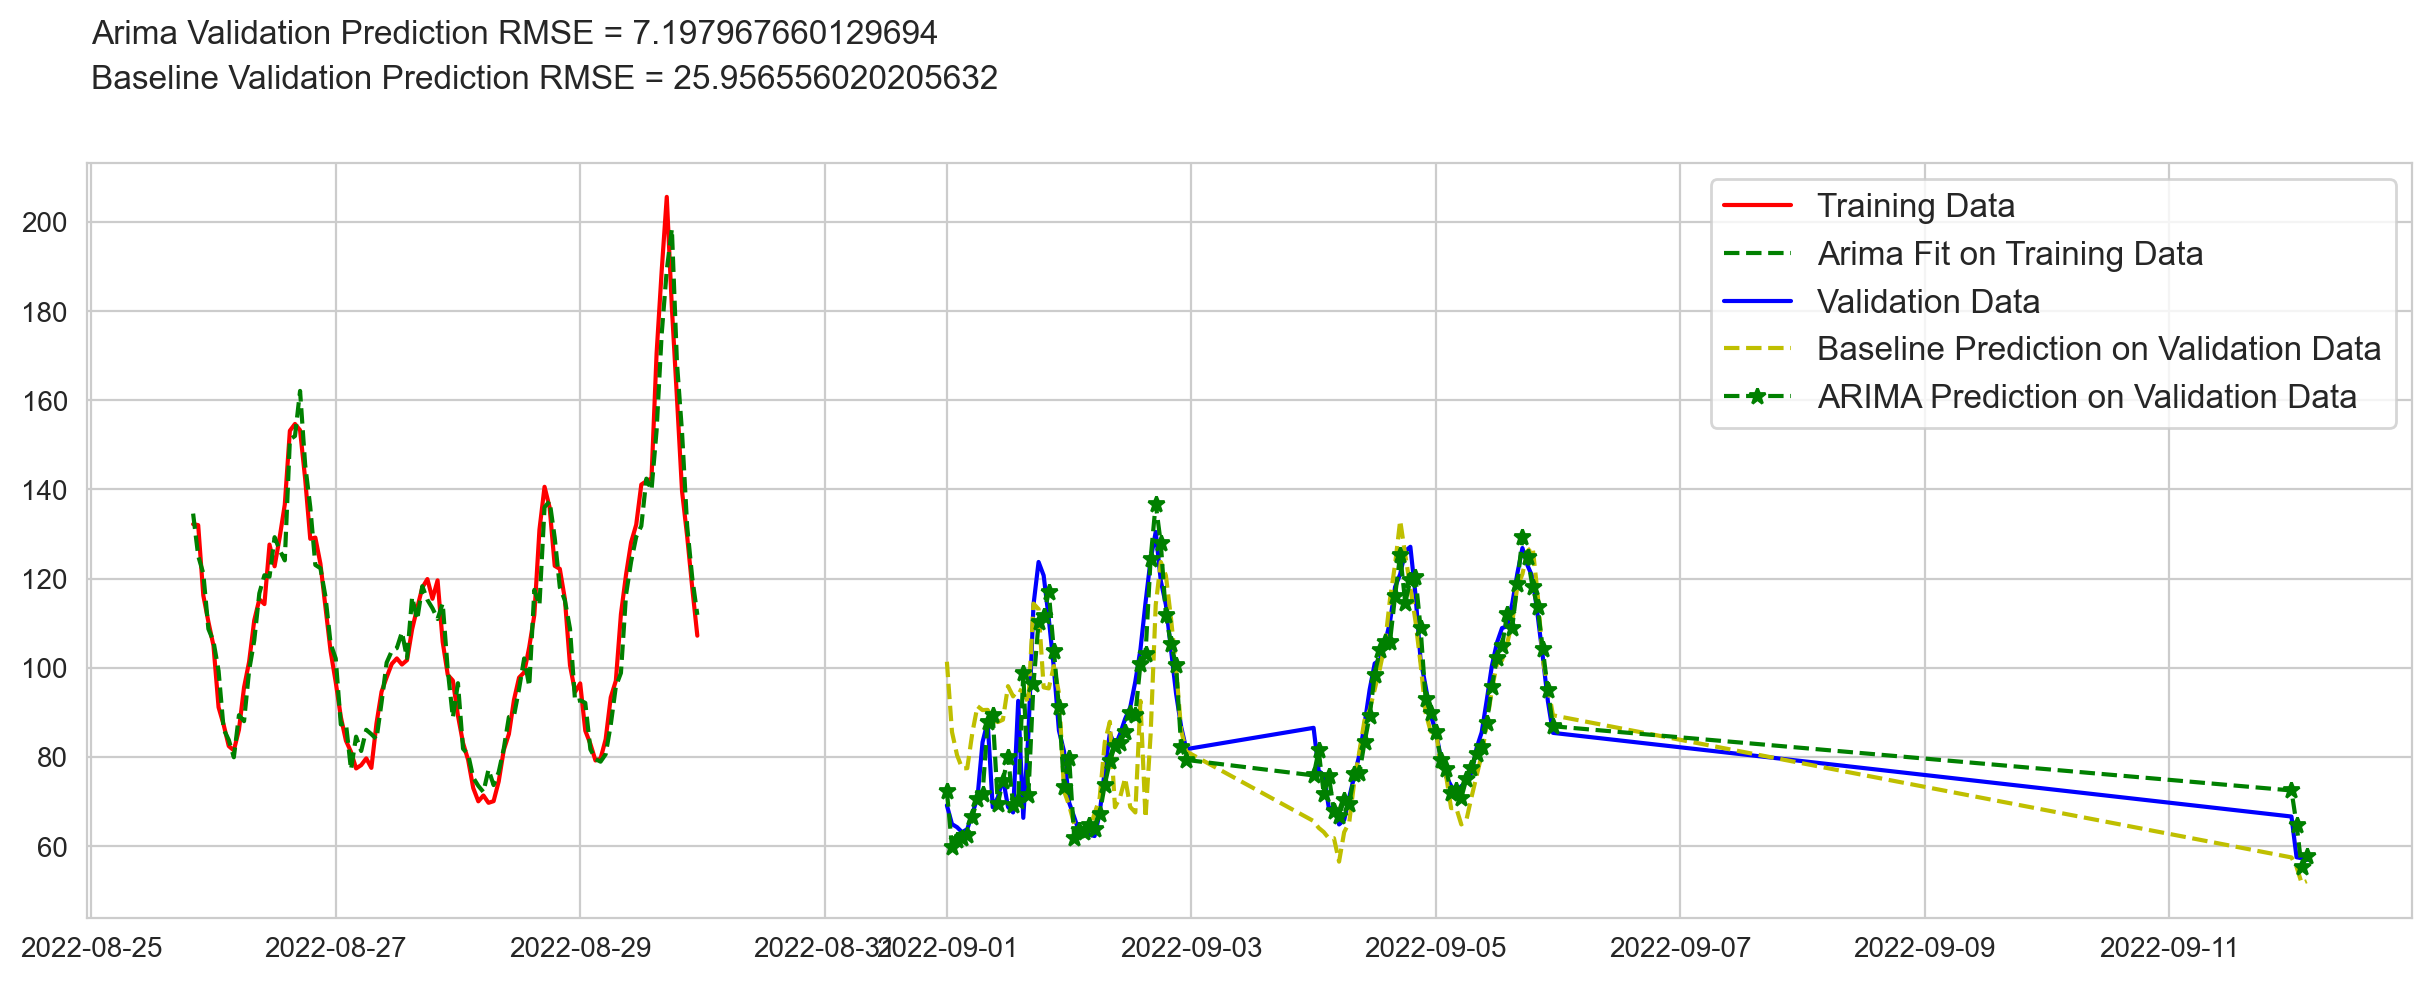

In [240]:
plt.figure(figsize=(15,5), dpi=200)

plt.plot(train_data.index.to_timestamp()[-100:], 
         train_data['DA_price'][-100:],
        'r-',
        label= 'Training Data')

plt.plot(train_data.index.to_timestamp()[-100:], 
         final_arima.fittedvalues[-100:],
        'g--',
        label= 'Arima Fit on Training Data')

plt.plot(val_data.index.to_timestamp()[:100],
         val_data['DA_price'][:100],
            'b-',
          label="Validation Data")

plt.plot(val_data.index.to_timestamp()[:100],
         val_data['DA_price(t-1D)'][:100],
            'y--',
            label="Baseline Prediction on Validation Data")

plt.plot(val_data.index.to_timestamp()[:100],
         preds[:100],
            'g--*',
            label="ARIMA Prediction on Validation Data")


plt.text(train_data['date'].values[-100], 230,
         "Baseline Validation Prediction RMSE = " + str(baseline_val_rmse),
         fontsize=12)
plt.text(train_data['date'].values[-100], 240,
         "Arima Validation Prediction RMSE = " + str(arima_val_rmse),
         fontsize=12)

plt.legend(fontsize=12, loc='best')

plt.show()

In [241]:
test_obs = final_arima.apply(endog = test_data['DA_price'], exog=test_data[f1], refit=False)
test_preds = test_obs.predict(0,len(test_data)-1, dynamic=False)
arima_test_rmse = np.sqrt(mean_squared_error(test_data['DA_price'],test_preds))
arima_test_rmse

7.213072116175197

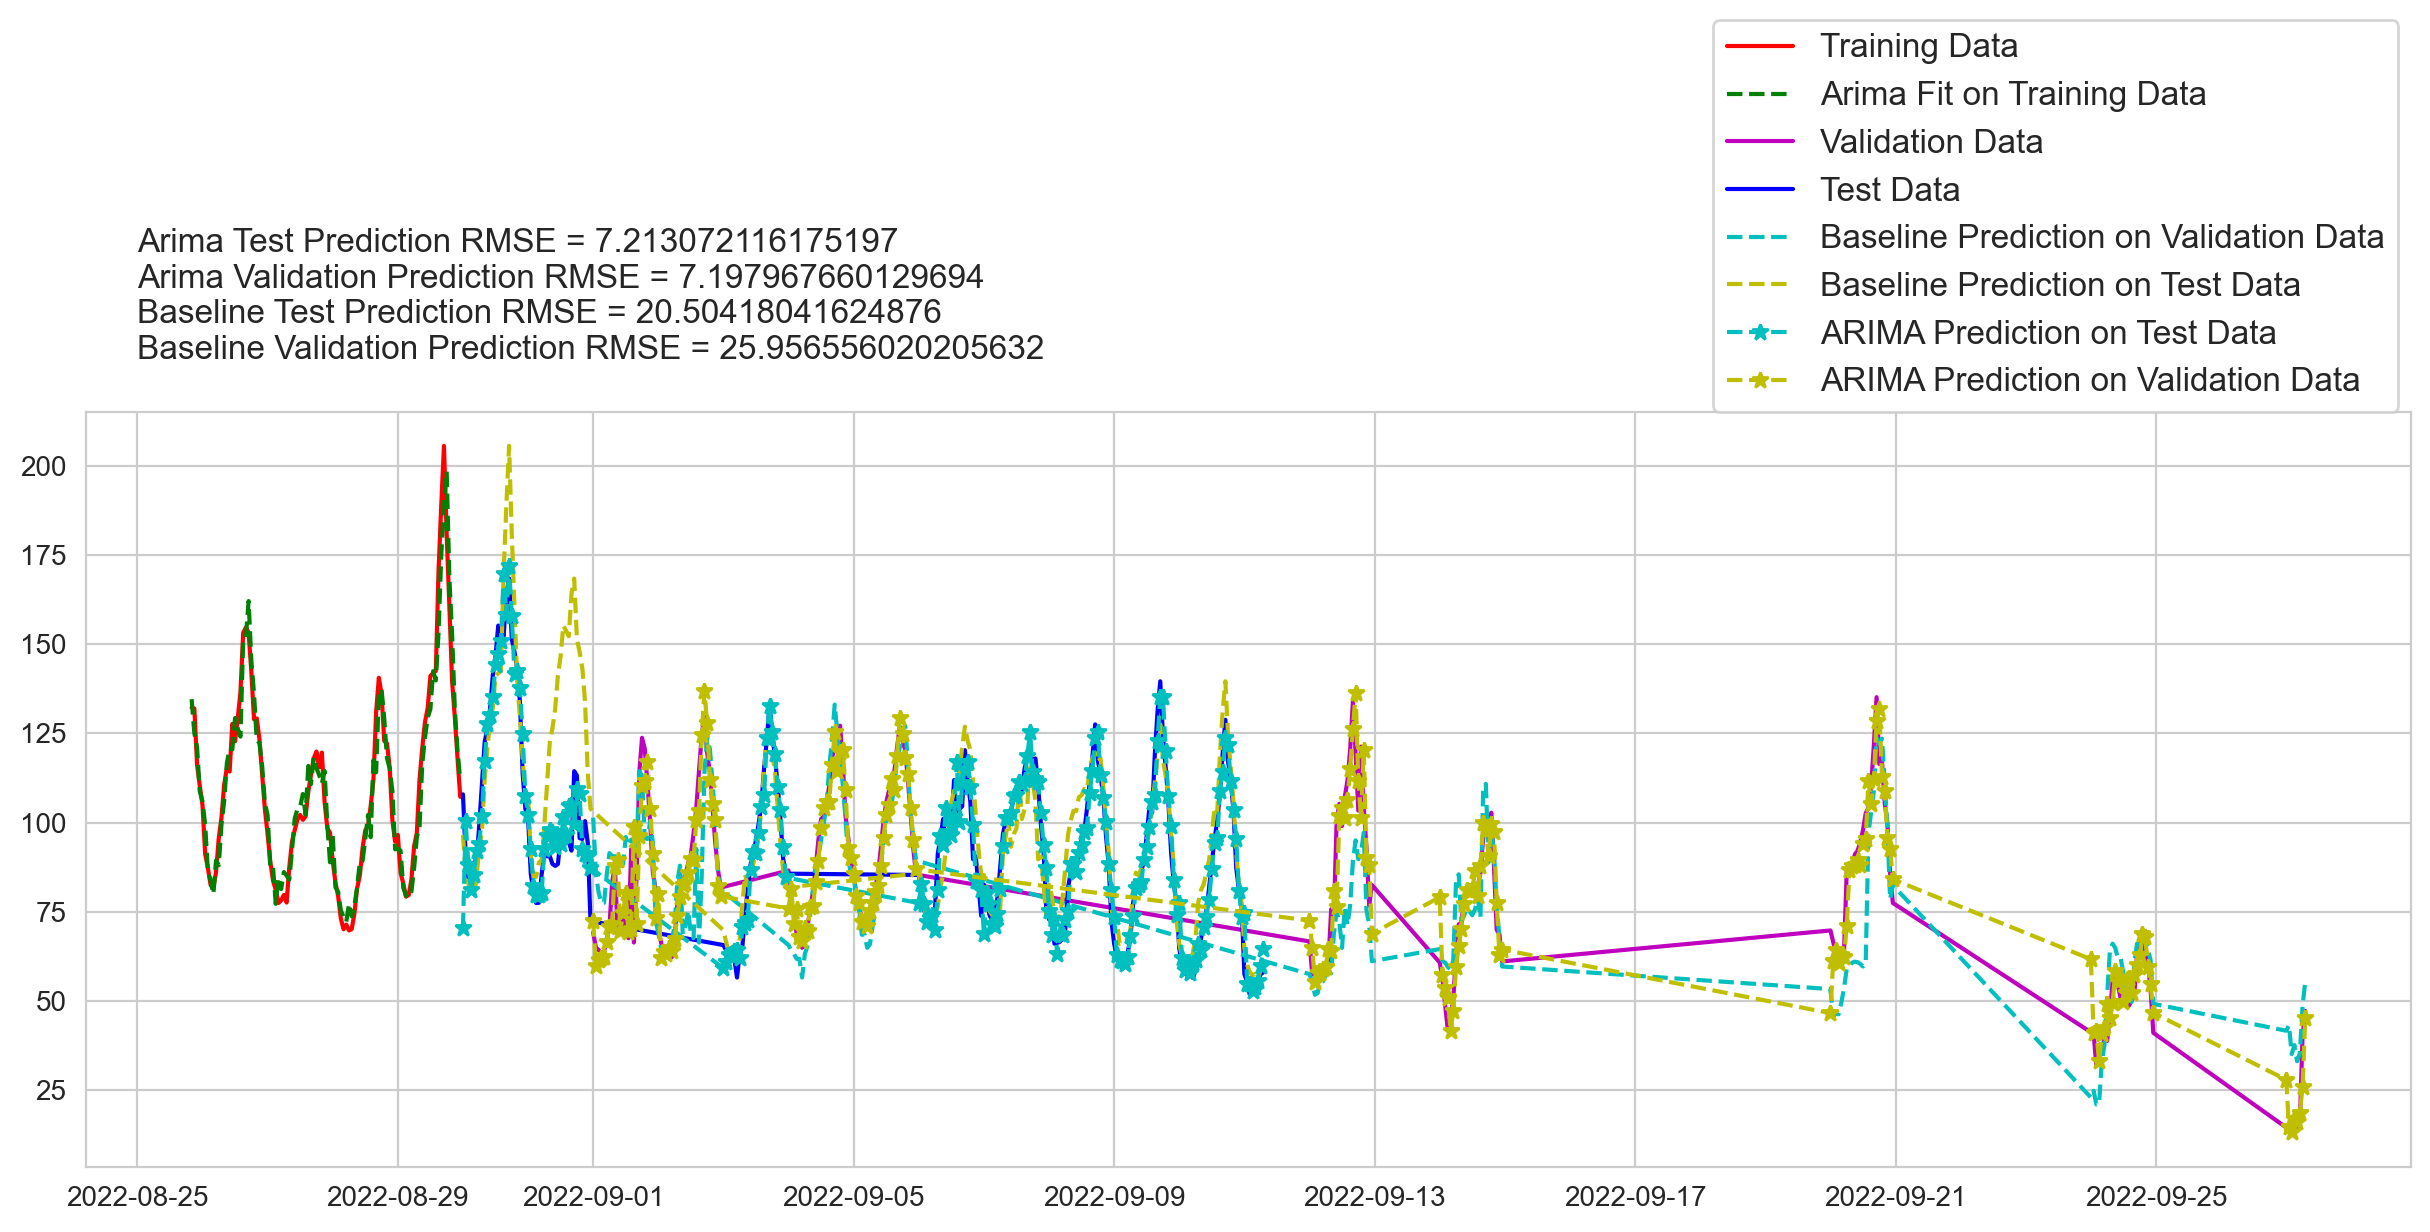

In [295]:
plt.figure(figsize=(15,5), dpi=200)

plt.plot(train_data.index.to_timestamp()[-100:], 
         train_data['DA_price'][-100:],
        'r-',
        label= 'Training Data')

plt.plot(train_data.index.to_timestamp()[-100:], 
         final_arima.fittedvalues[-100:],
        'g--',
        label= 'Arima Fit on Training Data')

plt.plot(val_data.index.to_timestamp()[:200],
         val_data['DA_price'][:200],
           'm-',
          label="Validation Data")

plt.plot(test_data.index.to_timestamp()[:200],
         test_data['DA_price'][:200],
           'b-',
          label="Test Data")

plt.plot(val_data.index.to_timestamp()[:200],
         val_data['DA_price(t-1D)'][:200],
            'c--',
            label="Baseline Prediction on Validation Data")

plt.plot(test_data.index.to_timestamp()[:200],
         test_data['DA_price(t-1D)'][:200],
            'y--',
            label="Baseline Prediction on Test Data")

plt.plot(test_data.index.to_timestamp()[:200],
         test_preds[:200],
            'c--*',
            label="ARIMA Prediction on Test Data")

plt.plot(val_data.index.to_timestamp()[:200],
         preds[:200],
            'y--*',
            label="ARIMA Prediction on Validation Data")


plt.text(train_data['date'].values[-100], 230,
         "Baseline Validation Prediction RMSE = " + str(baseline_val_rmse),
         fontsize=12)
plt.text(train_data['date'].values[-100], 240,
         "Baseline Test Prediction RMSE = " + str(baseline_test_rmse),
         fontsize=12)
plt.text(train_data['date'].values[-100], 250,
         "Arima Validation Prediction RMSE = " + str(arima_val_rmse),
         fontsize=12)
plt.text(train_data['date'].values[-100], 260,
         "Arima Test Prediction RMSE = " + str(arima_test_rmse),
         fontsize=12)

plt.legend(fontsize=12, loc=[0.7,1])

plt.show()

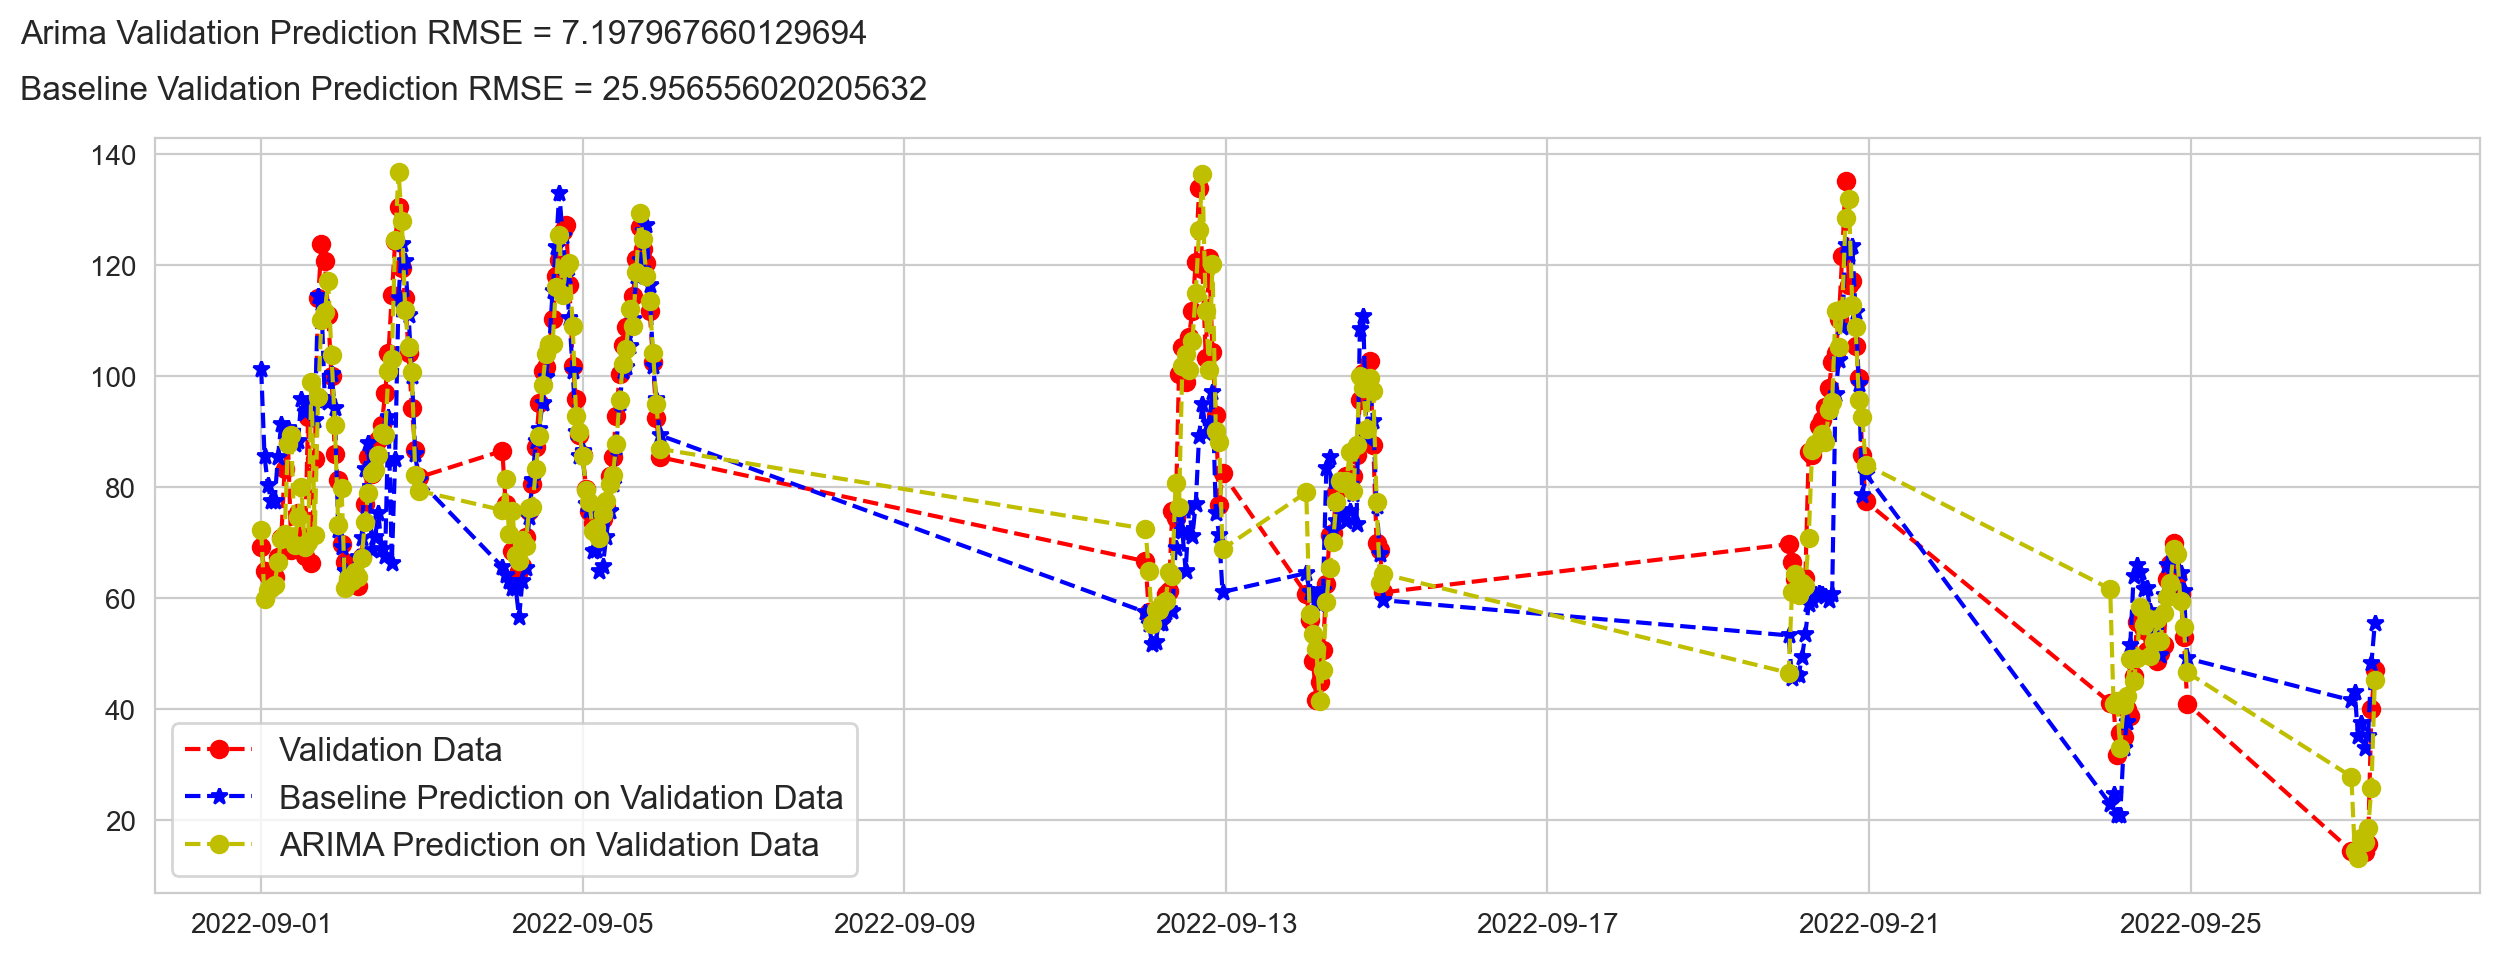

In [280]:
plt.figure(figsize=(15,5), dpi=200)


plt.plot(val_data.index.to_timestamp()[:200],
         val_data['DA_price'][:200],
           'r--o',
          label="Validation Data")


plt.plot(val_data.index.to_timestamp()[:200],
         val_data['DA_price(t-1D)'][:200],
            'b--*',
            label="Baseline Prediction on Validation Data")

plt.plot(val_data.index.to_timestamp()[:200],
         preds[:200],
            'y--o',
            label="ARIMA Prediction on Validation Data")


plt.text(train_data['date'].values[-10], 150,
         "Baseline Validation Prediction RMSE = " + str(baseline_val_rmse),
         fontsize=12)
plt.text(train_data['date'].values[-10], 160,
         "Arima Validation Prediction RMSE = " + str(arima_val_rmse),
         fontsize=12)

plt.legend(fontsize=12, loc='best')

plt.show()

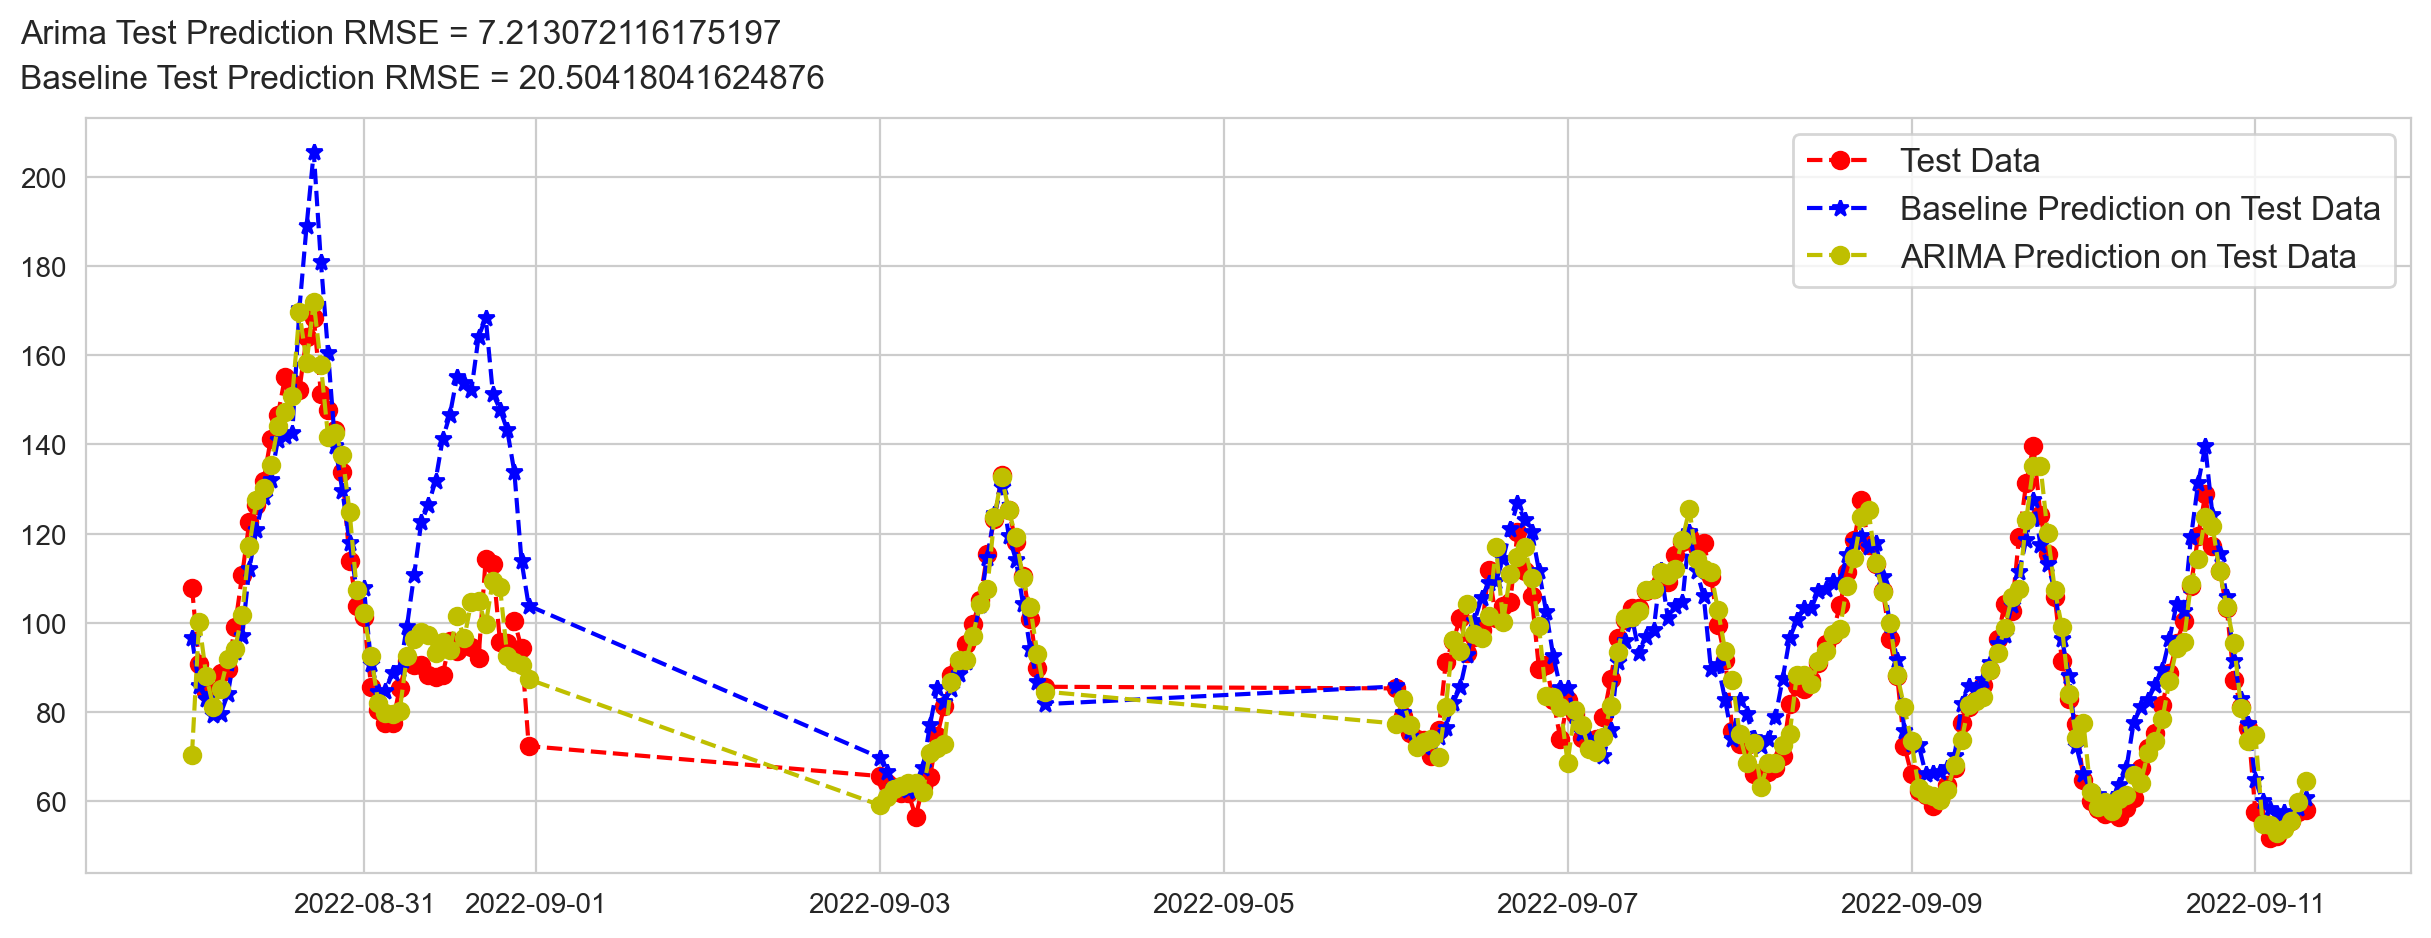

In [286]:
plt.figure(figsize=(15,5), dpi=200)


plt.plot(test_data.index.to_timestamp()[:200],
         test_data['DA_price'][:200],
           'r--o',
          label="Test Data")


plt.plot(test_data.index.to_timestamp()[:200],
         test_data['DA_price(t-1D)'][:200],
            'b--*',
            label="Baseline Prediction on Test Data")

plt.plot(test_data.index.to_timestamp()[:200],
         test_preds[:200],
            'y--o',
            label="ARIMA Prediction on Test Data")


plt.text(train_data['date'].values[-10], 220,
         "Baseline Test Prediction RMSE = " + str(baseline_test_rmse),
         fontsize=12)
plt.text(train_data['date'].values[-10], 230,
         "Arima Test Prediction RMSE = " + str(arima_test_rmse),
         fontsize=12)

plt.legend(fontsize=12, loc='best')

plt.show()

In [297]:
final_arima.save('arima_final_results_11252023.pkl')

In [300]:
from statsmodels.tsa.arima.model import ARIMAResults

In [301]:
model = ARIMAResults.load('arima_final_results_11252023.pkl')

In [302]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               DA_price   No. Observations:                16118
Model:              SARIMAX(24, 1, 7)   Log Likelihood              -53592.174
Date:                Sat, 25 Nov 2023   AIC                         107260.349
Time:                        22:53:12   BIC                         107552.479
Sample:                    10-27-2020   HQIC                        107356.933
                         - 08-29-2022                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
DA_price(t-1D)         0.2799      0.006     48.776      0.000       0.269       0.291
DA_price(t-2D)         0.1236      0.004     34.980      0.000       0.117       0.131
DA_price(t-3D)         0.1133      0.003     37.112      0.000       0.107       0.119
DA_price(t-4D)         0.0938      0.003     31.073      0.000       0.088       0.100
DA_price(t-5D)         0.1357      0.003     43.439      0.000       0.130       0.142
avg_DA_price(h-24)    -0.0203      0.006     -3.184      0.001      -0.033      -0.008
ar.L1                 -0.2070      0.082     -2.512      0.012      -0.369      -0.045
ar.L2                  0.6592      0.054     12.271      0.000       0.554       0.764
ar.L3                  0.4670      0.035     13.404      0.000       0.399       0.535
ar.L4                 -0.0461      0.055     -0.840      0.401      -0.154       0.062
ar.L5                 -0.6563      0.046    -14.192      0.000      -0.747      -0.566
ar.L6                  0.2504      0.034      7.283      0.000       0.183       0.318
ar.L7                  0.2593      0.053      4.894      0.000       0.155       0.363
ar.L8                  0.0076      0.007      1.036      0.300      -0.007       0.022
ar.L9                  0.0485      0.006      7.911      0.000       0.036       0.060
ar.L10                -0.0004      0.006     -0.059      0.953      -0.013       0.012
ar.L11                 0.0003      0.006      0.056      0.955      -0.012       0.012
ar.L12                -0.0143      0.006     -2.467      0.014      -0.026      -0.003
ar.L13                 0.0175      0.005      3.417      0.001       0.007       0.027
ar.L14                 0.0504      0.006      8.504      0.000       0.039       0.062
ar.L15                -0.0084      0.006     -1.499      0.134      -0.019       0.003
ar.L16                -0.0501      0.006     -8.600      0.000      -0.062      -0.039
ar.L17                 0.0076      0.005      1.393      0.164      -0.003       0.018
ar.L18                -0.0162      0.005     -2.946      0.003      -0.027      -0.005
ar.L19                -0.0351      0.006     -5.983      0.000      -0.047      -0.024
ar.L20                -0.0172      0.007     -2.628      0.009      -0.030      -0.004
ar.L21                 0.0212      0.007      3.083      0.002       0.008       0.035
ar.L22                 0.0763      0.005     14.374      0.000       0.066       0.087
ar.L23                 0.0460      0.008      5.944      0.000       0.031       0.061
ar.L24                -0.0452      0.009     -5.308      0.000      -0.062      -0.029
ma.L1                  0.2002      0.083      2.423      0.015       0.038       0.362
ma.L2                 -0.7467      0.053    -13.959      0.000      -0.852      -0.642
ma.L3                 -0.5812      0.040    -14.641      0.000      -0.659      -0.503
ma.L4                  0.0367      0.063      0.585      0.558      -0.086       0.160
ma.L5                 